In [1]:
# Import required libraries
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px


# Read the airline data into pandas dataframe
spacex_df = pd.read_csv(r"C:\Users\suean\Downloads\spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

color_map = {
    'v1.0': '#636EFA',
    'v1.1': '#EF553B',
    'FT': '#00CC96',
    'B4': '#AB63FA',
    'B5': '#FFA15A',
}

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',
                                                options=[
                                                    {'label': 'All Sites', 'value': 'ALL'},
                                                    {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                                                    {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
                                                    {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                                                    {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                                                ],
                                                value='ALL',
                                                placeholder="Select a Launch Site here",
                                                searchable=True
                                                ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, 
                                                max=10000, 
                                                step=5,
                                                marks={i: str(i) for i in range(0, 10001, 2500)},
                                                value=[min_payload, max_payload]),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
# Function decorator to specify function input and output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'),
            Input(component_id='site-dropdown', component_property='value'))
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(
            filtered_df, 
            values='class', 
            names='Launch Site', 
            title='Total Successful Launches By Site'
        )
    else:
        # return the outcomes piechart for a selected site
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        # Count successes and failures
        class_counts = filtered_df['class'].value_counts().reset_index()
        fig = px.pie(
            class_counts,
            values='count',
            names='class',
            title=f'Launch Outcomes for Site: {entered_site}'
        )
    return fig


# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(Output(component_id='success-payload-scatter-chart', component_property='figure'),
             [Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")])
def get_scatter_chart(entered_site, payload_range):    
    if entered_site == 'ALL':
        filtered_df = spacex_df[spacex_df['Payload Mass (kg)'].between(payload_range[0], payload_range[1])]
        fig = px.scatter(
            filtered_df, 
            x='Payload Mass (kg)', 
            y='class', 
            color="Booster Version Category",
            title='Correlation between Payload and Success for all Sites',
            color_discrete_map=color_map 
        )
        # # Make markers unfilled circles (i.e., hollow)
        # fig.update_traces(marker=dict(symbol='circle-open'))
    else:
        # return the outcomes scatter chart for a selected site
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        filtered_df = filtered_df[filtered_df['Payload Mass (kg)'].between(payload_range[0], payload_range[1])]
        fig = px.scatter(
            filtered_df,
            x='Payload Mass (kg)', 
            y='class', 
            color="Booster Version Category",
            title=f'Correlation between Payload and Success for Site: {entered_site}',
            color_discrete_map=color_map
        )
    return fig

# Run the app
if __name__ == '__main__':
    app.run()


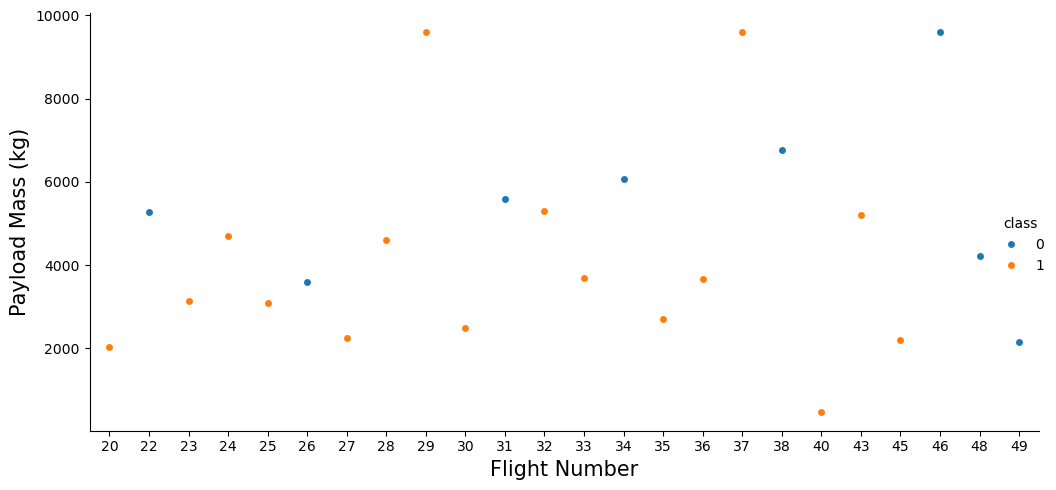

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create the catplot
data_booster = spacex_df[spacex_df['Booster Version Category'] == 'FT']
g = sns.catplot(x="Flight Number", y="Payload Mass (kg)", hue="class", data=data_booster, aspect=2)

# Reduce number of ticks (e.g., show every 5th label)
ax = g.ax  # get the single underlying axis
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])  # adjust interval here (e.g., every 5th)

# Customize axis labels
plt.ylabel("Payload Mass (kg)", fontsize=15)
plt.xlabel("Flight Number", fontsize=15)

plt.tight_layout()
plt.show()